### Imports

In [2]:
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image

import torch
import torchvision
from torchvision import transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor


/opt/homebrew/Caskroom/miniforge/base/envs/ml_proj/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Model

In [3]:
def load_model_instance_segmentation(num_classes:int):
    
    # Load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
    
    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    
    # Replace pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    
    return model


loaded_model = load_model_instance_segmentation(3)
loaded_model.load_state_dict(torch.load("../model/mask_detection_fasterrcnn.pt"))
loaded_model.eval()

/opt/homebrew/Caskroom/miniforge/base/envs/ml_proj/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_proj/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

### Plotting

In [4]:
def plot_image(img_tensor, annotation):
    
    fig,ax = plt.subplots(1)
    img = img_tensor.cpu().data

    # Display the image
    ax.imshow(img.permute(1, 2, 0))
    
    for box in annotation["boxes"]:
        xmin, ymin, xmax, ymax = box
        xmin = xmin.detach().numpy()
        ymin = ymin.detach().numpy()
        xmax = xmax.detach().numpy()
        ymax = ymax.detach().numpy()

        # Create a Rectangle patch
        rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
    ax.axis(False)
    plt.show()

In [5]:
# Transformation step

data_transform = transforms.Compose([
    transforms.ToTensor(),
])

### Inference

In [6]:
img_path = os.path.join(os.getcwd(), "../data/images/maksssksksss100.png")
img = Image.open(img_path).convert("RGB")
img = data_transform(img)

In [7]:
prediction = loaded_model([img])
prediction

[{'boxes': tensor([[119.4880,  89.0805, 162.4865, 125.4775],
          [387.7197,  54.6029, 400.0000,  73.8362],
          [188.5019,  32.6898, 242.9445,  87.5316],
          [218.4391,  36.2575, 242.2808,  54.2512],
          [387.2352,  51.5945, 400.0000,  74.0525],
          [218.5800,  34.9320, 241.8810,  54.1099],
          [187.6246,  37.7517, 241.2433,  85.6345]], grad_fn=<StackBackward0>),
  'labels': tensor([1, 1, 1, 2, 2, 1, 2]),
  'scores': tensor([0.9929, 0.9914, 0.9885, 0.1839, 0.1419, 0.1108, 0.0516],
         grad_fn=<IndexBackward0>)}]

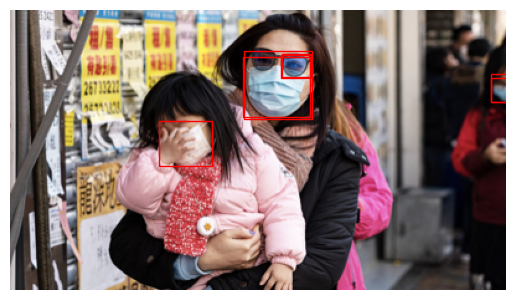

In [8]:
plot_image(img, prediction[0])